# Lab3 (Student version)
## Students:
## Jack Thay - 21201079
## Thierry Ung - 3804472

In [1]:
import random
import matplotlib.pyplot as plt
import sys
import timeit

from IPython.display import Image #used to display image in this notebook
from collections import defaultdict, deque
import time #used to measure execution time from our code

Download the three following graphs:
- http://lioneltabourier.fr/documents/drosophila.txt
- http://snap.stanford.edu/data/com-LiveJournal.html
- http://snap.stanford.edu/data/email-Eu-core.html (optional, might be too large)

It is also useful to consider some toy graphs (e.g. manually created graphs with a dozen nodes) to test your programs.

## Exercise 0: preliminaries

Using the codes of Lab1, load the graphs in memory as dictionary of lists and check their number of nodes and links.

In [2]:
# Code taken from our TP1

def count_nodes_edges(filename):
    # Initialize an empty set to store unique nodes
    nodes = set()
    # Initialize an empty set to store unique edges
    unique_edges = set()

    # Open the specified file in read ('r') mode
    with open(filename, 'r') as file:
        # Iterate through each line in the file
        for line in file:
            # Skip lines starting with '#' (comments)
            if line.startswith('#'):
                continue

            # Remove leading and trailing whitespace and split the line into parts
            edge_info = line.strip().split()
            # Check if the line does not contain exactly two values (node identifiers)
            if len(edge_info) != 2:
                # Skip lines that don't have two values
                continue
            # Sort the edge_info to ensure order independence and convert it to a tuple
            edge = tuple(sorted(edge_info))
            # Check if the edge is not already in the set of unique_edges
            if edge not in unique_edges:
                # Add the edge to the set of unique_edges
                unique_edges.add(edge)
                # Add both node identifiers to the 'nodes' set
                nodes.update(edge_info)

    # Calculate the number of unique nodes by finding the length of the 'nodes' set
    num_nodes = len(nodes)
    # The total number of unique edges has already been counted in the 'unique_edges' set
    num_edges = len(unique_edges)

    # Return the counts of nodes and edges as a tuple
    return num_nodes, num_edges

In [3]:
# Code taken from our TP1

def load_graph(filename):
    # Initialize an empty dictionary for the adjacency list.
    adjacency_list = {}
    
    # Open the specified file for reading.
    with open(filename, 'r') as file:
        # Loop through each line in the file.
        for line in file:
            # Check if the line does not start with '#' (comments)
            if not line.startswith('#'):
                # Split the line into two nodes representing an edge.
                edge_info = line.strip().split()
                node1, node2 = edge_info[0], edge_info[1]

                # Check if node1 is not already in the adjacency list.
                if node1 not in adjacency_list:
                    # Initialize an empty list for node1 in the adjacency list.
                    adjacency_list[node1] = []

                # Check if node2 is not already in the adjacency list.
                if node2 not in adjacency_list:
                    # Initialize an empty list for node2 in the adjacency list.
                    adjacency_list[node2] = []

                # Add node2 to the adjacency list of node1 (representing an undirected edge).
                adjacency_list[node1].append(node2)
                # Add node1 to the adjacency list of node2 (since it's an undirected edge).
                adjacency_list[node2].append(node1)

    # Return the adjacency list representing the undirected graph.
    return adjacency_list

In [4]:
filename = 'test_graph.txt'
start_time = time.time()
num_nodes, num_edges = count_nodes_edges(filename)
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Nodes and edges counted in {time.time() - start_time:.5f} seconds")

Number of nodes: 9
Number of edges: 8
Nodes and edges counted in 0.01083 seconds


In [5]:
filename = 'test_graph.txt'
start_time = time.time()
test_graph = load_graph(filename)
print(f"Graph loaded in {time.time() - start_time:.5f} seconds")

Graph loaded in 0.01301 seconds


In [6]:
filename = 'drosophila.txt'
start_time = time.time()
num_nodes, num_edges = count_nodes_edges(filename)
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Nodes and edges counted in {time.time() - start_time:.5f} seconds")

Number of nodes: 7236
Number of edges: 22425
Nodes and edges counted in 0.11408 seconds


In [7]:
filename = 'drosophila.txt'
start_time = time.time()
drosophila_graph = load_graph(filename)
print(f"Graph loaded in {time.time() - start_time:.5f} seconds")

Graph loaded in 0.10102 seconds


In [8]:
filename = 'email-Eu-core.txt'
start_time = time.time()
num_nodes, num_edges = count_nodes_edges(filename)
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Nodes and edges counted in {time.time() - start_time:.5f} seconds")

Number of nodes: 1005
Number of edges: 16706
Nodes and edges counted in 0.08090 seconds


In [9]:
filename = 'email-Eu-core.txt'
start_time = time.time()
email_graph = load_graph(filename)
print(f"Graph loaded in {time.time() - start_time:.5f} seconds")

Graph loaded in 0.05931 seconds


In [10]:
filename = 'com-lj.ungraph.txt'
start_time = time.time()
num_nodes, num_edges = count_nodes_edges(filename)
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Nodes and edges counted in {time.time() - start_time:.5f} seconds")

Number of nodes: 3997962
Number of edges: 34681189
Nodes and edges counted in 153.42806 seconds


In [11]:
filename = 'com-lj.ungraph.txt'
start_time = time.time()
com_graph = load_graph(filename)
print(f"Graph loaded in {time.time() - start_time:.5f} seconds")

Graph loaded in 123.32950 seconds


## Exercise 1: BFS

### 1.1 Components

- Implement a BFS algorithm.  

- Use it on each of the graphs to evaluate the size of the largest connected component of these graphs.
- Use it to identify all connected components.

Warning: if your BFS is not well coded, it can be very long, so if it doesn't work on Amazon or LiveJournal in less than a few minutes, either improve your code, or test only on smaller graphs. 

In [12]:
def bfs(graph, start):
    visited = set()
    queue = deque([start])
    component = []

    while queue:
        current = queue.popleft()
        if current not in visited:
            visited.add(current)
            component.append(current)
            queue.extend(node for node in graph[current] if node not in visited)

    return component

In [13]:
def bfs_with_print(graph, start):
    visited = set()
    queue = deque([start])
    component = []
    nodes_visited = 0
    all_nodes = []

    while queue:
        current = queue.popleft()
        if current not in visited:
            visited.add(current)
            component.append(current)
            nodes_visited += 1
            all_nodes.append(current)

            queue.extend(node for node in graph[current] if node not in visited)

    if nodes_visited <= 10:
        print(*all_nodes, end=' ')
    else:
        print(*all_nodes[:10], end=' ')
        print(*all_nodes[-10:], end=' ')
        print("\nPrinted the 10 first and last nodes.")

    return component

In [14]:
def test_bfs(graph, start_node):
    start_time = time.time()
    print(f"BFS starting from vertex {start_node}:")
    result = bfs_with_print(graph, start_node)
    print(f"\nBFS done in {time.time() - start_time:.5f} seconds")

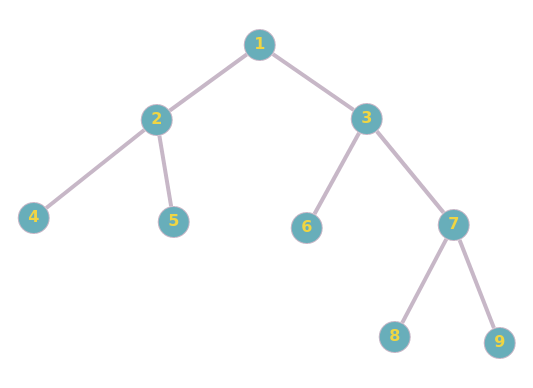

In [15]:
# Displaying an image of our test_graph, in case we need visual confirmation
Image(filename="./test_graph.png")

In [16]:
graph = test_graph
start_node = "7"
result = test_bfs(graph, start_node)

BFS starting from vertex 7:
7 3 8 9 1 6 2 4 5 
BFS done in 0.00031 seconds


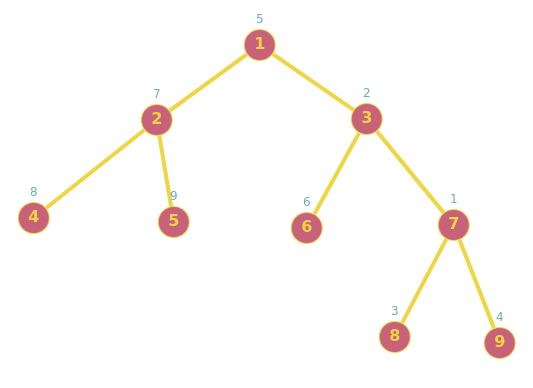

In [17]:
# Same graph, but with BFS algorithm applied for node 7, for reference
Image(filename="./test_graph_BFS.png")

In [18]:
graph = drosophila_graph
start_node = "0"
result = test_bfs(graph, start_node)

BFS starting from vertex 0:
0 1 2 3 4 5 6 7 8 9 3985 65 2428 5688 5213 7183 6249 6269 6754 7052 
Printed the 10 first and last nodes.

BFS done in 0.03576 seconds


In [19]:
graph = email_graph
start_node = "0"
result = test_bfs(graph, start_node)

BFS starting from vertex 0:
0 1 17 316 146 581 268 221 218 18 995 583 794 876 915 846 634 449 603 916 
Printed the 10 first and last nodes.

BFS done in 0.02568 seconds


In [20]:
graph = com_graph
start_node = "0"
result = test_bfs(graph, start_node)

BFS starting from vertex 0:
0 1 2 31 73 80 113619 2468556 2823829 2823833 3864109 3875339 3373887 3847906 3847911 3965135 3988338 3988339 3911578 3847908 
Printed the 10 first and last nodes.

BFS done in 53.40549 seconds


In [21]:
def connected_components(graph):
    visited = set()
    components = []

    for vertex in graph:
        if vertex not in visited:
            component = bfs(graph, vertex)
            components.append(component)
            visited.update(component)

    return components

In [22]:
def process_graph(graph):
    start_time = time.time()
    # Find the largest connected component
    components = connected_components(graph)
    largest_component = max(components, key=len)
    
    # Display the largest connected component
    if len(largest_component) > 10:
        print(f"Largest connected component: {largest_component[:10]}...{largest_component[-10:]}")
    else:
        print(f"Largest connected component: {largest_component}")
    
    print(f"\nSize of the largest connected component: {len(largest_component)}")
    print("\nAll connected components:")
    
    # Display all connected components
    for i, component in enumerate(components, 1):
        if len(component) > 10:
            print(f"Component {i}: {component[:10]}...{component[-10:]}")
        else:
            print(f"Component {i}: {component}")
    
    print(f"\nConnected components found in {time.time() - start_time:.5f} seconds")

In [23]:
graph = test_graph
result = process_graph(graph)

Largest connected component: ['2', '1', '4', '5', '3', '6', '7', '8', '9']

Size of the largest connected component: 9

All connected components:
Component 1: ['2', '1', '4', '5', '3', '6', '7', '8', '9']

Connected components found in 0.00055 seconds


In [24]:
graph = drosophila_graph
result = process_graph(graph)

Largest connected component: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']...['3985', '65', '2428', '5688', '5213', '7183', '6249', '6269', '6754', '7052']

Size of the largest connected component: 7236

All connected components:
Component 1: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']...['3985', '65', '2428', '5688', '5213', '7183', '6249', '6269', '6754', '7052']

Connected components found in 0.02057 seconds


In [25]:
graph = email_graph
result = process_graph(graph)

Largest connected component: ['0', '1', '17', '316', '146', '581', '268', '221', '218', '18']...['995', '583', '794', '876', '915', '846', '634', '449', '603', '916']

Size of the largest connected component: 986

All connected components:
Component 1: ['0', '1', '17', '316', '146', '581', '268', '221', '218', '18']...['995', '583', '794', '876', '915', '846', '634', '449', '603', '916']
Component 2: ['580']
Component 3: ['633']
Component 4: ['648']
Component 5: ['653']
Component 6: ['658']
Component 7: ['660']
Component 8: ['670']
Component 9: ['675']
Component 10: ['684']
Component 11: ['691']
Component 12: ['703']
Component 13: ['711']
Component 14: ['731']
Component 15: ['732']
Component 16: ['744']
Component 17: ['746']
Component 18: ['772']
Component 19: ['798']
Component 20: ['808']

Connected components found in 0.01973 seconds


In [26]:
graph = com_graph
result = process_graph(graph)

Largest connected component: ['0', '1', '2', '31', '73', '80', '113619', '2468556', '2823829', '2823833']...['3864109', '3875339', '3373887', '3847906', '3847911', '3965135', '3988338', '3988339', '3911578', '3847908']

Size of the largest connected component: 3997962

All connected components:
Component 1: ['0', '1', '2', '31', '73', '80', '113619', '2468556', '2823829', '2823833']...['3864109', '3875339', '3373887', '3847906', '3847911', '3965135', '3988338', '3988339', '3911578', '3847908']

Connected components found in 38.57279 seconds


### 1.2 Distances

- Modify the BFS above to have it compute the distance to the source node.

- Using the fact that the diameter is necessarily larger than any distance measured, use your distance computation code to get a lower bound of the diameter. The higher the bound, the better.

shema distance


In [27]:
def bfs_with_distance(graph, start):
    if start not in graph:
        print(f"Error: The starting node '{start}' does not exist in the graph.")
        return
    
    visited = set()
    queue = deque([(start, 0)])  # Adding distance information with each node
    distances = {start: 0}  # Dictionary to store distances

    while queue:
        current, distance = queue.popleft()
        if current not in visited:
            visited.add(current)
            for neighbor in graph[current]:
                if neighbor not in visited:
                    queue.append((neighbor, distance + 1))
                    distances[neighbor] = distance + 1

    return distances

In [28]:
def test_bfs_distance(graph, start_node):
    start_time = time.time()
    distances = bfs_with_distance(graph, start_node)
    # Displaying only the 10 first and last if more than 10, else display all
    if len(distances) > 10:
        first_10 = list(distances.items())[:10]
        last_10 = list(distances.items())[-10:]
        display_distances = dict(first_10 + last_10)
    else:
        display_distances = distances
    
    print("Distances:", display_distances)
    print(f"Calculating distance done in {time.time() - start_time:.5f} seconds")

In [29]:
graph = test_graph
start_node = "7"
result = test_bfs_distance(graph, start_node)

Distances: {'7': 0, '3': 1, '8': 1, '9': 1, '1': 2, '6': 2, '2': 3, '4': 4, '5': 4}
Calculating distance done in 0.00032 seconds


In [30]:
graph = drosophila_graph
start_node = "0"
result = test_bfs_distance(graph, start_node)

Distances: {'0': 0, '1': 1, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '8': 1, '9': 1, '3985': 7, '65': 7, '2428': 7, '5688': 7, '5213': 7, '7183': 7, '6249': 7, '6269': 7, '6754': 7, '7052': 8}
Calculating distance done in 0.02755 seconds


In [31]:
graph = email_graph
start_node = "0"
result = test_bfs_distance(graph, start_node)

Distances: {'0': 0, '1': 1, '17': 2, '316': 2, '146': 2, '581': 1, '268': 2, '221': 2, '218': 2, '18': 2, '995': 4, '583': 4, '794': 4, '876': 4, '915': 4, '846': 4, '634': 4, '449': 4, '603': 4, '916': 4}
Calculating distance done in 0.03188 seconds


In [32]:
graph = com_graph
start_node = "0"
result = test_bfs_distance(graph, start_node)

Distances: {'0': 0, '1': 1, '2': 2, '31': 2, '73': 2, '80': 1, '113619': 1, '2468556': 1, '2823829': 1, '2823833': 1, '3864109': 12, '3875339': 12, '3373887': 12, '3847906': 12, '3847911': 12, '3965135': 12, '3988338': 12, '3988339': 12, '3911578': 13, '3847908': 13}
Calculating distance done in 67.69833 seconds


In [33]:
def lower_bound_diameter(graph, sample_size=None):
    # Initialize lower bound to 0
    lower_bound = 0

    # If sample_size is None, use all nodes for BFS, otherwise, use a sample
    nodes_to_sample = list(graph.keys())

    if sample_size is not None and sample_size > 0:
        # Ensure that the sample size is not greater than the population size
        sample_size = min(sample_size, len(nodes_to_sample))
        nodes_to_sample = random.sample(nodes_to_sample, sample_size)

    # Compute distances for sampled nodes in a single BFS traversal
    all_distances = {}
    for start_node in nodes_to_sample:
        distances = bfs_with_distance(graph, start_node)
        all_distances[start_node] = distances

    # Iterate over each node to determine eccentricity
    for start_node, distances in all_distances.items():
        eccentricity = max(distances.values())

        # Update lower bound if the eccentricity is greater
        lower_bound = max(lower_bound, eccentricity)

    return lower_bound

In [34]:
graph = test_graph
sample_size = 10
start_time = time.time()
lower_bound = lower_bound_diameter(graph, sample_size=sample_size)
print(f"Lower bound for diameter: {lower_bound}")
print(f"Calculating lower bound done in {time.time() - start_time:.5f} seconds")

Lower bound for diameter: 5
Calculating lower bound done in 0.00126 seconds


In [35]:
graph = drosophila_graph
sample_size = 100
start_time = time.time()
lower_bound = lower_bound_diameter(graph, sample_size=sample_size)
print(f"Lower bound for diameter: {lower_bound}")
print(f"Calculating lower bound done in {time.time() - start_time:.5f} seconds")

Lower bound for diameter: 10
Calculating lower bound done in 2.91994 seconds


In [36]:
graph = email_graph
sample_size = 100
start_time = time.time()
lower_bound = lower_bound_diameter(graph, sample_size=sample_size)
print(f"Lower bound for diameter: {lower_bound}")
print(f"Calculating lower bound done in {time.time() - start_time:.5f} seconds")

Lower bound for diameter: 6
Calculating lower bound done in 3.35188 seconds


In [37]:
graph = com_graph
sample_size = 1
start_time = time.time()
lower_bound = lower_bound_diameter(graph, sample_size=sample_size)
print(f"Lower bound for diameter: {lower_bound}")
print(f"Calculating lower bound done in {time.time() - start_time:.5f} seconds")

Lower bound for diameter: 14
Calculating lower bound done in 76.82953 seconds


## Exercise 2: Triangles

### 2.1 Raw triangle counting

- Implement the 2 triangle counting algorithms presented in the course. 

- Test your program on the 3 graphs and report the number of triangles as well as the running time of your program.

In [38]:
def naive_triangle_count(graph):
    nb = 0

    # Iterate over all nodes
    for v in graph:
        neighbors_v = graph[v]

        # Iterate over neighbors of v
        for u1 in neighbors_v:
            # Iterate over neighbors of v (excluding u1)
            for u2 in neighbors_v:
                if u2 != u1:
                    # Check if u1 and u2 are neighbors
                    if u1 in graph[u2]:
                        nb += 1

    # Each triangle is counted 3 times, so divide by 6
    return nb // 6

In [49]:
def optimized_triangle_count(graph):
    nb = 0

    for v in graph:
        neighbors_v = set(graph[v])

        for u1 in neighbors_v:
            for u2 in neighbors_v:
                if u2 != u1:
                    # Check if u1 and u2 are neighbors
                    if u1 in graph and u2 in graph[u1]:
                        nb += 1

    # Each triangle is counted 3 times, so divide by 6
    return nb // 6

In [50]:
def test_naive_triangle_count(graph):
    start_time = time.time()
    result = optimized_triangle_count(graph)
    print("Number of triangles:", result)
    print(f"Calculating triangle done in {time.time() - start_time:.5f} seconds")

In [51]:
graph = test_graph
test_naive_triangle_count(graph)

Number of triangles: 0
Calculating triangle done in 0.00013 seconds


In [52]:
graph = drosophila_graph
test_naive_triangle_count(graph)

Number of triangles: 2994
Calculating triangle done in 0.89346 seconds


In [53]:
graph = email_graph
test_naive_triangle_count(graph)

Number of triangles: 114535
Calculating triangle done in 8.12261 seconds


In [54]:
graph = com_graph
test_naive_triangle_count(graph)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/thierry/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_56/4159357701.py", line 2, in <module>
    test_naive_triangle_count(graph)
  File "/tmp/ipykernel_56/747330203.py", line 3, in test_naive_triangle_count
    result = optimized_triangle_count(graph)
  File "/tmp/ipykernel_56/378881294.py", line -1, in optimized_triangle_count
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/thierry/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/thierry/.local/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/thierry/.local/lib/pyt

In [78]:
def improved_triangle_counting(graph):
    nb = 0

    # Iterate over all edges (u, v) where u < v
    for u in graph:
        for v in graph[u]:
            if u < v:
                # Iterate over common neighbors of u and v
                common_neighbors = set(graph[u]) & set(graph[v])
                for w in common_neighbors:
                    if v < w:
                        nb += 1

    return nb

In [95]:
def improved_triangle_counting(graph):
    nb = 0

    for u, neighbors_u in graph.items():
        for v in neighbors_u:
            if u < v:
                common_neighbors = set(graph[u]).intersection(graph[v])
                for w in common_neighbors:
                    if v < w:
                        nb += 1

    return nb

In [96]:
def test_improved_triangle_count(graph):
    start_time = time.time()
    result = improved_triangle_counting(graph)
    print("Number of triangles:", result)
    print(f"Calculating triangle done in {time.time() - start_time:.5f} seconds")


In [97]:
graph = test_graph
test_improved_triangle_count(graph)

Number of triangles: 0
Calculating triangle done in 0.00025 seconds


In [98]:
graph = drosophila_graph
test_improved_triangle_count(graph)

Number of triangles: 2179
Calculating triangle done in 0.11764 seconds


In [99]:
graph = email_graph
test_improved_triangle_count(graph)

Number of triangles: 177025
Calculating triangle done in 0.53033 seconds


In [101]:
graph = com_graph
test_improved_triangle_count(graph)

KeyboardInterrupt: 

### 2.2 Transitive ratio

Use this program to compute the transitive ratio of the graphs. Remember that the transitive ratio is defined as 
$$ \frac{3.number \ of \ triangles}{number \ of \ forks}$$
and that the number of forks (or connected triples) of a node of degree $d$ is simply $\frac{d(d-1)}{2}$.

In [122]:
def transitive_ratio(graph):
    triangles = 0
    forks = 0

    for u, neighbors_u in graph.items():
        degree_u = len(neighbors_u)
        forks += degree_u * (degree_u - 1) // 2  # Calculate forks for node u

        for v in neighbors_u:
            if u < v:
                common_neighbors = set(graph[u]).intersection(graph[v])
                triangles += len(common_neighbors)

    transitive_ratio = 0 if forks == 0 else 3 * triangles / forks
    return transitive_ratio

In [123]:
def test_transitive_ratio(graph):
    start_time = time.time()
    result = transitive_ratio(graph)
    print("Transitive ratio:", result)
    print(f"Calculating transitive ratio done in {time.time() - start_time:.5f} seconds")

In [124]:
graph = test_graph
test_transitive_ratio(graph)

Transitive ratio: 0.0
Calculating transitive ratio done in 0.00020 seconds


In [125]:
graph = drosophila_graph
test_transitive_ratio(graph)

Transitive ratio: 0.05813619901596416
Calculating transitive ratio done in 0.18122 seconds


In [126]:
graph = email_graph
test_transitive_ratio(graph)

Transitive ratio: 0.5498799301247006
Calculating transitive ratio done in 0.38221 seconds


In [111]:
graph = com_graph
test_transitive_ratio(graph)

KeyboardInterrupt: 

## * Exercice 3: Recent Research

\* Star exercice is a little bit advanced but very enriching. The point of this exercice is a little introduction to research paper reading and implementing some simple algorithms. 

If you do not do this exercice at all and perfectly do the other 2 (Exercice 1 and 2) you will get a good grade. But doing this exercice even only a part of it will help you get the highest marks.

**I do not want you to understand all the content of the papers. We are just implementing given algorithms. But of course understanding research papers can help you in your future career.**

**Do not hesitate to contact me or email me if you need any help.**

### 3.1  Recent research on triangle counting:

Take a look at the recent article (published in [Alenex 2023](https://epubs.siam.org/doi/book/10.1137/1.9781611977561)
) : https://epubs.siam.org/doi/pdf/10.1137/1.9781611977561.ch7 and implement the algorithms A++ and A+- and compare their running times on the 3 graphs

In [259]:
def a_plus_plus(graph):
    triangles = []

    # Step 1: Initialize array B with False for each vertex v
    B = {v: False for v in graph}

    # Step 2: for each vertex w
    for w in graph:
        # Step 3: for each vertex v in neighbors of w (N - w)
        for v in set(graph[w]) - {w}:
            B[v] = True

        # Step 5: for each vertex u in neighbors of w (N - w)
        for u in set(graph[w]) - {w}:
            # Step 6: for each vertex v in neighbors of u (N + u)
            for v in set(graph[u]) - {u}:
                # Step 7: if B[v]
                if B[v]:
                    # Step 8: output triangle {u, v, w}
                    triangles.append({u, v, w})

        # Step 9: for each vertex v in neighbors of w (N - w)
        for v in set(graph[w]) - {w}:
            B[v] = False

    return triangles

In [260]:
def test_a_plus_plus(graph):
    start_time = time.time()
    result = a_plus_plus(graph)

    # Display only the first 5 and last 5 triangles, or all if there are fewer than 10
    display_triangles = result[:5] + result[-5:] if len(result) > 5 else result

    print("Triangles :", display_triangles)
    print(f"Calculating triangle done in {time.time() - start_time:.5f} seconds")

In [261]:
graph = test_graph
test_a_plus_plus(graph)

Triangles : []
Calculating triangle done in 0.00021 seconds


In [262]:
graph = drosophila_graph
test_a_plus_plus(graph)

Triangles : [{'10', '0', '1'}, {'10', '0', '1'}, {'11', '5', '0'}, {'11', '5', '0'}, {'245', '827', '1'}, {'6457', '1182', '2097'}, {'6630', '506', '1456'}, {'6630', '506', '1456'}, {'5030', '6729', '513'}, {'513', '6729', '5030'}]
Calculating triangle done in 0.45666 seconds


In [263]:
graph = email_graph
test_a_plus_plus(graph)

Triangles : [{'103', '250', '0'}, {'250', '0', '166'}, {'0', '250', '1'}, {'377', '250', '0'}, {'368', '250', '0'}, {'826', '1001', '6'}, {'826', '1001', '803'}, {'826', '1001', '990'}, {'826', '1001', '193'}, {'826', '1001', '832'}]
Calculating triangle done in 1.49768 seconds


In [247]:
#graph = com_graph
#test_find_triangles(graph)

In [248]:
def a_plus_minus(graph):
    # Initialize B array
    B = {vertex: False for vertex in graph}

    # List to store triangles
    triangles = []

    # Iterate over each vertex u
    for u in graph:
        # Step 3: Mark neighbors of u as True in B
        for w in graph[u]:
            B[w] = True
        
        # Iterate over neighbors v of u
        for v in graph[u]:
            # Iterate over neighbors w of v
            for w in graph[v]:
                # Step 6: Check if B[w] is True
                if B[w]:
                    # Step 7: Store triangle {u, v, w} in the list
                    triangles.append((u, v, w))

        # Step 8: Reset B array
        for w in graph[u]:
            B[w] = False

    return triangles

In [249]:
def test_a_plus_minus(graph):
    start_time = time.time()
    triangles = a_plus_minus(graph)
    
    # Display the first 5 triangles and the last 5 (or all if less than 5)
    if not triangles:
        print("No triangle found")
    else:
        print("Triangles:")
        for triangle in triangles[:5]:
            print(f"Triangle found: {triangle}")

        if len(triangles) > 5:
            print("...")
            for triangle in triangles[-5:]:
                print(f"Triangle found: {triangle}")
    
    print(f"Calculating triangles done in {time.time() - start_time:.5f} seconds")

In [250]:
graph = test_graph
result = test_a_plus_minus(graph)

No triangle found
Calculating triangles done in 0.00013 seconds


In [251]:
graph = drosophila_graph
result = test_a_plus_minus(graph)

Triangles:
Triangle found: ('0', '1', '10')
Triangle found: ('0', '5', '11')
Triangle found: ('0', '10', '1')
Triangle found: ('0', '11', '5')
Triangle found: ('1', '0', '10')
...
Triangle found: ('7160', '2006', '2006')
Triangle found: ('7168', '2153', '2153')
Triangle found: ('7168', '2153', '2153')
Triangle found: ('7226', '2684', '2684')
Triangle found: ('7226', '2684', '2684')
Calculating triangles done in 0.47365 seconds


In [252]:
graph = email_graph
result = test_a_plus_minus(graph)

Triangles:
Triangle found: ('0', '1', '0')
Triangle found: ('0', '1', '74')
Triangle found: ('0', '1', '17')
Triangle found: ('0', '1', '316')
Triangle found: ('0', '1', '1')
...
Triangle found: ('1003', '258', '258')
Triangle found: ('1003', '258', '258')
Triangle found: ('1003', '258', '258')
Triangle found: ('1004', '55', '55')
Triangle found: ('1004', '55', '55')
Calculating triangles done in 2.88609 seconds


In [253]:
#graph = com_graph
#result = test_find_trianglesplusminus(graph)

### 3.2  Recent research on Clustering Coefficient:

Take a look at the recent article (published in [LATIN 2022](https://pakal.cs.cinvestav.mx/latin2022/)
) : https://www.inf.ufpr.br/vignatti/v/papers/2022-latin.pdf and implement the algorithm of local clustering coefficient estimation with relative errors of $ \epsilon = 1, 0.5, 0.1$ with probability $ p = 0.25$ and $\delta = 0.8$

In [385]:
def localClusteringEstimation(G, ε, δ, p):
    n = len(G)  # Number of vertices in the graph
    m = sum(len(adj_list) for adj_list in G.values()) // 2  # Number of edges in the graph
    Δ = max(len(adj_list) for adj_list in G.values())  # Maximum degree in the graph
    
    r = min(int((ε**2 * p * (2 * (Δ.bit_length() - 1) + 1) * (1 + math.log(1/δ))) / (p**2 * ε**2)), m)
    # Sample r edges from the graph
    sampled_edges = random.sample(list(G.keys()), r)
    
    # Initialize the local clustering coefficient estimates
    clustering_coefficients = {v: 0 for v in G}
    
    # Compute the local clustering coefficient estimates
    for edge in sampled_edges:
        vertices = edge  # Edge can have more than two vertices
        for a in vertices:
            for b in vertices:
                if a != b:
                    common_neighbors = set(G[a]) & set(G[b])
                    num_common_neighbors = len(common_neighbors)
                    if num_common_neighbors >= 2:
                        clustering_coefficients[a] += num_common_neighbors * (num_common_neighbors - 1)
                        clustering_coefficients[b] += num_common_neighbors * (num_common_neighbors - 1)
    
    # Normalize the local clustering coefficient estimates
    for v in G:
        degree_v = len(G[v])
        if degree_v >= 2:
            clustering_coefficients[v] /= (degree_v * (degree_v - 1))
    
    return clustering_coefficients

In [ ]:
localClusteringEstimation(com_graph, 0.25, 0.8, 0.1)